<a href="https://colab.research.google.com/github/joyceee916/ATMS-597-SP-2020-Project-4/blob/master/Project4_Joyce_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import seaborn as sns; sns.set()

In [2]:
cd /content/drive/My Drive/ATMS 597/Project4

/content/drive/My Drive/ATMS 597/Project4


Importing KCMI Observational Data

In [0]:
KCMI_df = pd.read_csv("KCMI_daily_format.csv", parse_dates=True, index_col='Date')

In [0]:
KCMI_df.rename(columns={'TMAX(C)': 'Max_Temp', 'TMIN(C)': 'Min_Temp', 'WMAX(M/s)': 'Max_Wind', 'PREC(mm}': 'Total_Precip'}, inplace = True)
KCMI_df.dropna(inplace=True)
KCMI_df.index = KCMI_df.index + pd.DateOffset(hours=12)  
KCMI_df = KCMI_df.rename_axis('Time')


In [6]:
KCMI_df.head()

,Max_Temp,Min_Temp,Max_Wind,Total_Precip
Time,,,,
2010-01-01 12:00:00,-11.111111,-16.666667,6.70560,0.0
2010-01-02 12:00:00,-14.444444,-20.555556,6.70560,0.0
2010-01-03 12:00:00,-12.222222,-21.111111,4.91744,0.0
2010-01-04 12:00:00,-11.666667,-18.888889,8.94080,0.0
2010-01-05 12:00:00,-12.222222,-18.333333,7.15264,0.0


GFS Model Data

In [0]:
GFS_df = pd.read_csv("GFS_daily_2010_2019_test.csv", parse_dates=True, index_col='Time')
GFS_df.drop(columns="Unnamed: 0", inplace=True)
GFS_df.dropna(inplace=True)

In [10]:
GFS_df['month_sin'] = np.sin(GFS_df.index.month*(2.*np.pi/24))
GFS_df['month_cos'] = np.cos(GFS_df.index.month*(2.*np.pi/24))
GFS_df['day_sin'] = np.sin(GFS_df.index.day*(2.*np.pi/24))
GFS_df['day_cos'] = np.cos(GFS_df.index.day*(2.*np.pi/24))
GFS_df.head()

,TMAX,TMIN,WMAX,RTOT,month_sin,month_cos,day_sin,day_cos
Time,,,,,,,,
2010-01-01 12:00:00,-11.26,-16.46,7.323933,0.05,0.258819,0.965926,0.258819,0.965926
2010-01-02 12:00:00,-10.16,-15.96,4.687217,0.00,0.258819,0.965926,0.500000,0.866025
2010-01-03 12:00:00,-9.96,-14.36,5.941380,0.06,0.258819,0.965926,0.707107,0.707107
2010-01-04 12:00:00,-8.46,-12.86,5.685068,0.17,0.258819,0.965926,0.866025,0.500000
2010-01-05 12:00:00,-7.16,-11.06,3.794733,0.77,0.258819,0.965926,0.965926,0.258819


In [0]:
# Combine GFS daily and KCMI daily
features_df = pd.merge(GFS_df.reset_index(), KCMI_df.reset_index(), on='Time', how='inner')
features_df.Time = pd.to_datetime(features_df.Time)
features_df['Year'] = features_df.Time.dt.year

In [12]:
features_df.head()

,Time,TMAX,TMIN,WMAX,RTOT,month_sin,month_cos,day_sin,day_cos,Max_Temp,Min_Temp,Max_Wind,Total_Precip,Year
0,2010-01-01 12:00:00,-11.26,-16.46,7.323933,0.05,0.258819,0.965926,0.258819,0.965926,-11.111111,-16.666667,6.70560,0.0,2010
1,2010-01-02 12:00:00,-10.16,-15.96,4.687217,0.00,0.258819,0.965926,0.500000,0.866025,-14.444444,-20.555556,6.70560,0.0,2010
2,2010-01-03 12:00:00,-9.96,-14.36,5.941380,0.06,0.258819,0.965926,0.707107,0.707107,-12.222222,-21.111111,4.91744,0.0,2010
3,2010-01-04 12:00:00,-8.46,-12.86,5.685068,0.17,0.258819,0.965926,0.866025,0.500000,-11.666667,-18.888889,8.94080,0.0,2010
4,2010-01-05 12:00:00,-7.16,-11.06,3.794733,0.77,0.258819,0.965926,0.965926,0.258819,-12.222222,-18.333333,7.15264,0.0,2010


In [0]:
# Split into training and test sets 
# Can change features 
x_train_all = features_df[features_df.Time.dt.year<2019]
x_test_all = features_df[features_df.Time.dt.year==2019]

y_train_all = features_df[features_df.Time.dt.year<2019]
y_test_all = features_df[features_df.Time.dt.year==2019]

In [46]:
x_test.head()

,TMAX,TMIN,WMAX,month_sin,month_cos
3213,1.54,-1.16,5.859181,0.258819,0.965926
3214,4.74,-2.26,4.609772,0.258819,0.965926
3215,5.24,-0.06,3.667424,0.258819,0.965926
3216,9.54,0.64,4.701064,0.258819,0.965926
3217,7.54,1.64,7.029225,0.258819,0.965926


Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt

In [49]:
# Create linear regression model 
lin_model = LinearRegression()

# pick variables 
features = ['TMAX', 'TMIN', 'WMAX','month_sin', 'month_cos']
target = ['Max_Temp']
x_train = x_train_all[features]
y_train = y_train_all[target]

x_test = x_test_all[features]
y_test = y_test_all[target]

lin_model.fit(x_train, y_train)

# Print parameters and plot - GFS Data
print('Coefficients: \n', lin_model.coef_)
print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, lin_model.predict(x_test)))
print("The Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, lin_model.predict(x_test)))
print("The Root Mean Square Error: %.2f degrees celsius " %  sqrt(mean_squared_error(y_test, lin_model.predict(x_test))))

print('Coefficient of determination: %.2f' % r2_score(y_test, lin_model.predict(x_test)))

Coefficients: 
 [[ 0.40140493  0.49302013  0.14403299  7.05578278 -1.80949872]]
The Mean Absolute Error: 3.18 degrees celsius
The Median Absolute Error: 2.40 degrees celsius
The Root Mean Square Error: 4.14 degrees celsius 
Coefficient of determination: 0.88


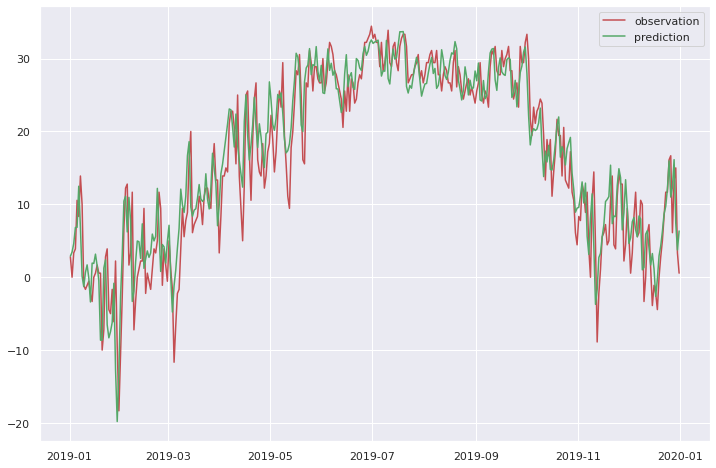

In [58]:
# Plot predicted values against observed values 
time = features_df[features_df['Year']==2019]['Time'].values
plt.figure(figsize=(12,8))
plt.plot(time, y_test, c='r', label='observation')
plt.plot(time, lin_model.predict(x_test), c='g', label='prediction')
plt.legend()
plt.savefig('linearregression.jpg')
plt.show()

Random Forest

In [52]:
# Create random forest regression model 
from sklearn.ensemble import RandomForestRegressor 
rf_model = RandomForestRegressor()

features = ['TMAX', 'TMIN', 'WMAX','month_sin', 'month_cos']
target = ['Max_Temp']
x_train = x_train_all[features]
y_train = y_train_all[target]

x_test = x_test_all[features]
y_test = y_test_all[target]

rf_model.fit(x_train, y_train)

# Print parameters and plot - GFS Data
print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, rf_model.predict(x_test)))
print("The Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, rf_model.predict(x_test)))
print("The Root Mean Square Error: %.2f degrees celsius " %  sqrt(mean_squared_error(y_test, rf_model.predict(x_test))))

print('Coefficient of determination: %.2f' % r2_score(y_test, rf_model.predict(x_test)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


The Mean Absolute Error: 3.14 degrees celsius
The Median Absolute Error: 2.28 degrees celsius
The Root Mean Square Error: 4.13 degrees celsius 
Coefficient of determination: 0.88


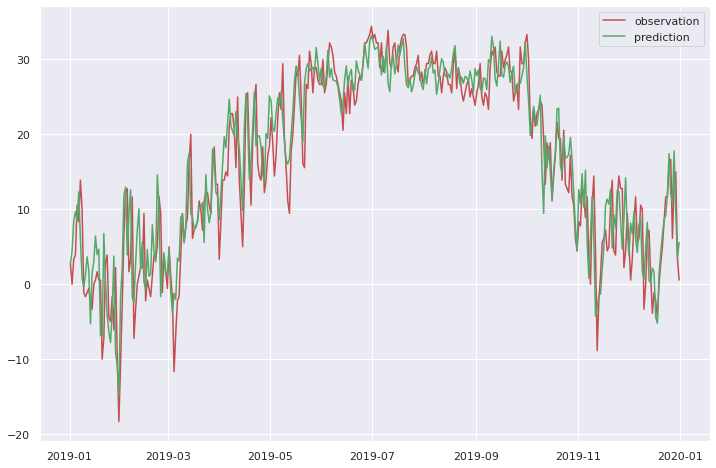

In [56]:
# Plot predicted values against observed values 
time = features_df[features_df['Year']==2019]['Time'].values
plt.figure(figsize=(12,8))
plt.plot(time, y_test, c='r', label='observation')
plt.plot(time, rf_model.predict(x_test), c='g', label='prediction')
plt.legend()
plt.savefig('randomforest.jpg')
plt.show()